In [1]:
import netCDF4 as nc
import numpy as np
# Path to the NetCDF file
nc_file = 'Data_TC/Spatial/Track/daily_track_density_Observation_five_degree.nc'

# Open the NetCDF file
with nc.Dataset(nc_file, 'r') as ncfile:
    # Extract variables
    latitudes = ncfile.variables['lat'][:]
    longitudes = ncfile.variables['lon'][:]
    track_density = ncfile.variables['track_density'][:]  # Shape: (time, lat, lon)

    # Calculate the mean track density over time
    mean_track_density = np.sum(track_density, axis=0)  # Mean along the time axis

    # Define the region of interest for the plot
    lon_min, lon_max = 0, 360
    lat_min, lat_max = -40, 40

    # Create a meshgrid for longitude and latitude
    lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

    # Scale the mean track density
    Obs = mean_track_density /20


In [3]:
import netCDF4 as nc
import numpy as np

# Base path to the NetCDF files
base_path = 'Data_TC/Spatial/Track/'

# Dictionary to store the results for each week
week_trk_results = {}

# Loop through weeks 1 to 8
for week in range(1, 9):
    # Construct the file path
    IAP_CAS_nc_file = f'{base_path}week{week}_lag0_ddaily_track_density_five_degre.nc'
    
    # Open the NetCDF file
    with nc.Dataset(IAP_CAS_nc_file, 'r') as ncfile:
        # Extract variables
        trk_density = ncfile.variables['track_density'][:]  # Shape: (time, lat, lon)

        # Calculate the sum of track density over time
        week_sum = np.sum(trk_density, axis=0)  # Sum along the time axis

        # Scale the sum track density
        week_trk = week_sum / 320 # divide by 16 ensemble * 20 year

        # Store the result in the dictionary with the key as 'weekX_gen'
        week_trk_results[f'week{week}_trk'] = week_trk

    #print(f'Processed week {week}')

week1_trk = week_trk_results['week1_trk']
week2_trk = week_trk_results['week2_trk']
week3_trk = week_trk_results['week3_trk']
week4_trk = week_trk_results['week4_trk']
week5_trk = week_trk_results['week5_trk']
week6_trk = week_trk_results['week6_trk']
week7_trk = week_trk_results['week7_trk']
week8_trk = week_trk_results['week8_trk']


In [4]:
week1_IBTrACS=week1_trk-Obs
week2_IBTrACS=week2_trk-Obs
week3_IBTrACS=week3_trk-Obs
week4_IBTrACS=week4_trk-Obs
week5_IBTrACS=week5_trk-Obs
week6_IBTrACS=week6_trk-Obs
week7_IBTrACS=week7_trk-Obs
week8_IBTrACS=week8_trk-Obs

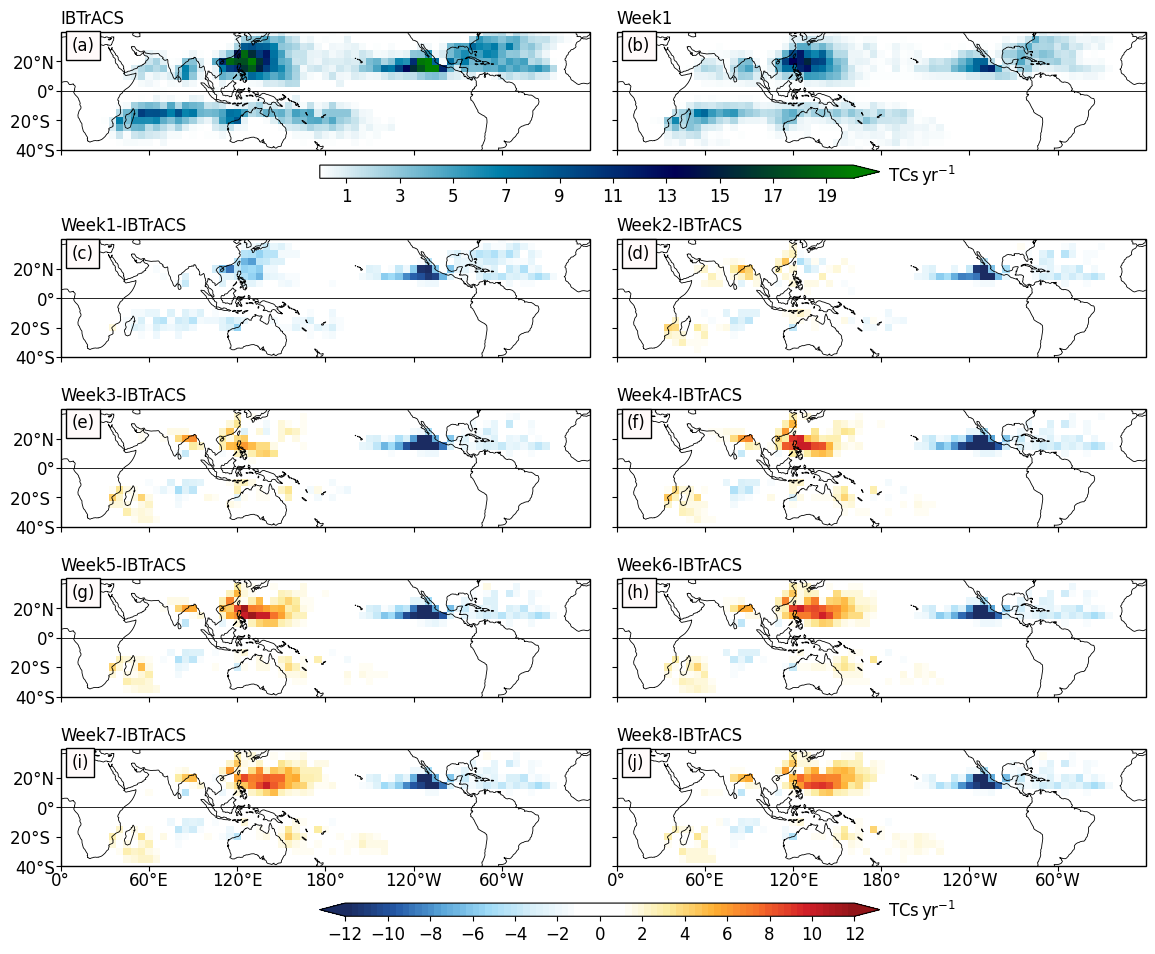

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.feature as cfeature
import cmaps


lon_min = 0
lon_max = 360
lat_min = -40
lat_max = 40

lat = np.linspace(lat_min, lat_max, 17)  
lon = np.linspace(lon_min, lon_max, 73) 
lon_grid_mesh, lat_grid_mesh = np.meshgrid(lon, lat)

# Create subplots with Cartopy and specify the projection
fig, axes = plt.subplots(5, 2, figsize=(14, 12), sharex=False, sharey=False, 
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, 
                         gridspec_kw={'height_ratios': [1.3, 0.9, 0.9, 0.9, 0.9], 'hspace': 0.00})


# Assign individual axes for easier customization
ax1, ax2 = axes[0, 0], axes[0, 1]
ax3, ax4 = axes[1, 0], axes[1, 1]
ax5, ax6 = axes[2, 0], axes[2, 1]
ax7, ax8 = axes[3, 0], axes[3, 1]
ax9, ax10 = axes[4, 0], axes[4, 1]

extent = [lon_min, lon_max, lat_min, lat_max]

def format_axis(ax):
    ax.set_extent(extent, crs=ccrs.PlateCarree())  # Use the 'extent' variable here
    ax.add_feature(cfeature.COASTLINE, linewidth=0.6, edgecolor="k")
    ax.add_feature(cfeature.LAND, color="gainsboro")
    ax.add_feature(cfeature.OCEAN, color="white")
    
    # Draw parallels and meridians with custom ticks
    parallels = np.arange(-40, 40, 20)  # Latitudes: -40, -20, 0, 20
    meridians = np.arange(0, 360, 60)  # Longitudes: 0, 60, 120, 180, 240, 300, 360
    ax.set_yticks(parallels, crs=ccrs.PlateCarree())
    ax.set_xticks(meridians, crs=ccrs.PlateCarree())

extent = [lon_min, lon_max, lat_min, lat_max]

# Function to format each axis in the grid
def format_axis(ax):
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, linewidth=0.6, edgecolor="k")
    ax.add_feature(cfeature.LAND, color="gainsboro")
    ax.add_feature(cfeature.OCEAN, color="white")
    
    # Draw parallels and meridians with custom ticks
    #ax.gridlines(draw_labels=False, linewidth=0.2, color='gray', linestyle='--')
    
    # Set specific parallels and meridians
    parallels = np.arange(-40, 40, 20)  # Latitudes: -40, -20, 0, 20
    meridians = np.arange(0, 360, 60)  # Longitudes: -180, -120, -60, 0, 60, 120, 180
    ax.set_yticks(parallels, crs=ccrs.PlateCarree())
    ax.set_xticks(meridians, crs=ccrs.PlateCarree())
    

data_list = [Obs, week1_trk,
             week1_IBTrACS, week2_IBTrACS,
             week3_IBTrACS, week4_IBTrACS,
             week5_IBTrACS, week6_IBTrACS,
             week7_IBTrACS, week8_IBTrACS]

num_divisions = 80
custom_cmapp = plt.get_cmap('BlueWhiteOrangeRed', num_divisions) #cmap=cmaps.BlueWhiteOrangeRed

for ax, data in zip(axes.flat, data_list):
    format_axis(ax)  # Format the axis with coastlines, land, and ocean features
    
    if ax == ax1:  # For ax1 (kobs), use ocean_r colormap
        pcolormesh_kobs = ax.pcolormesh(lon_grid_mesh, lat_grid_mesh, Obs,
                                        cmap='ocean_r', vmin=0.01, vmax=20, transform=ccrs.PlateCarree())
    elif ax == ax2:  # For ax2 (week1), use ocean_r colormap
        pcolormesh_week1 = ax.pcolormesh(lon_grid_mesh, lat_grid_mesh, week1_trk,
                                         cmap='ocean_r', vmin=0.01, vmax=20, transform=ccrs.PlateCarree())
    else:  # For other axes, use custom_cmapp
        pcolormesh = ax.pcolormesh(lon_grid_mesh, lat_grid_mesh, data,
                                    cmap=custom_cmapp, vmin=-12, vmax=12, transform=ccrs.PlateCarree()) 

#ax13.set_xticks([0, 60, 120, 180, 240, 300])
ax9.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W'])
ax10.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W'])


ax9.tick_params(axis='x', labelsize=12, labelcolor='black',pad=0.8)  
ax10.tick_params(axis='x', labelsize=12, labelcolor='black',pad=0.8)  


ax1.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])
ax3.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])
ax5.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])
ax7.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])
ax9.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])
# Optionally, adjust the labels to ensure visibility (font size, position)
ax1.tick_params(axis='y', labelsize=12, labelcolor='black',pad=0.5)  
ax3.tick_params(axis='y', labelsize=12, labelcolor='black',pad=0.5)  
ax5.tick_params(axis='y', labelsize=12, labelcolor='black',pad=0.5) 
ax7.tick_params(axis='y', labelsize=12, labelcolor='black',pad=0.5) 
ax9.tick_params(axis='y', labelsize=12, labelcolor='black',pad=0.5)


# List of axes for the specific conditions
x_axes_to_hide_labels = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
y_axes_to_hide_labels = [ax2,ax4, ax6, ax8, ax10]

# Apply the conditions for x-axis and y-axis tick labels
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]:
    # Hide x-axis labels in the specified axes
    if ax in x_axes_to_hide_labels:
        ax.tick_params(axis='x', labelsize=0, labelcolor='white')

for ax in [ax2, ax4, ax6, ax8, ax10]:
    # Hide y-axis labels in the specified axes
    if ax not in [ax1, ax5, ax9]:  # Removed ax13 since it doesn't exist
        ax.tick_params(axis='y', labelsize=0, labelcolor='white')



# List of axes to apply the text labels
axes_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

# Loop through the axes and add the corresponding label
for i, ax in enumerate(axes_list):
    label = f'({chr(97 + i)})'  # Generate labels like '(a)', '(b)', etc.
    ax.text(0.02, 0.84, label, transform=ax.transAxes, fontsize=12, color='k', 
            bbox=dict(facecolor='snow', alpha=1, edgecolor='k'))


ax1.axhline(0, color='k', linewidth=0.6)  # Add Equator line
ax2.axhline(0, color='k', linewidth=0.6) 
ax3.axhline(0, color='k', linewidth=0.6) 
ax4.axhline(0, color='k', linewidth=0.6) 
ax5.axhline(0, color='k', linewidth=0.6) 
ax6.axhline(0, color='k', linewidth=0.6) 
ax7.axhline(0, color='k', linewidth=0.6) 
ax8.axhline(0, color='k', linewidth=0.6) 
ax9.axhline(0, color='k', linewidth=0.6) 
ax10.axhline(0, color='k', linewidth=0.6) 



ax1.set_title('IBTrACS', fontsize=12,loc='left')
ax2.set_title('Week1', fontsize=12,loc='left')
ax3.set_title('Week1-IBTrACS', fontsize=12,loc='left')
ax4.set_title('Week2-IBTrACS', fontsize=12,loc='left')
ax5.set_title('Week3-IBTrACS', fontsize=12,loc='left')
ax6.set_title('Week4-IBTrACS', fontsize=12,loc='left')
ax7.set_title('Week5-IBTrACS', fontsize=12,loc='left')              
ax8.set_title('Week6-IBTrACS', fontsize=12,loc='left')
ax9.set_title('Week7-IBTrACS', fontsize=12,loc='left') 
ax10.set_title('Week8-IBTrACS', fontsize=12,loc='left')

for row in axes:
    for ax in row:
        for spine in ax.spines.values():
            spine.set_linewidth(1)  
    
    
cbar_ax = fig.add_axes([0.31, 0.705, 0.4, 0.011]) 
cbar = fig.colorbar(pcolormesh_kobs, cax=cbar_ax, orientation='horizontal', extend='max', drawedges=False)
cbar.ax.tick_params(labelsize=12)
cbar.set_ticks([1, 3, 5, 7, 9, 11,13,15,17,19])

fig.text(0.74, 0.707, '$\mathrm{TCs\, yr}^{-1}$', ha='center', va='center', rotation='horizontal',fontsize=12)


cbar_axx = fig.add_axes([0.31, 0.09, 0.4, 0.011])  # Adjust the values as needed
cbarr = fig.colorbar(pcolormesh, cax=cbar_axx, orientation='horizontal', extend='both', drawedges=False)
cbarr.ax.tick_params(labelsize=12)
cbarr.set_ticks([-12,-10,-8, -6, -4, -2,0, 2, 4,6,8,10,12])
fig.text(0.74, 0.095, '$\mathrm{TCs\, yr}^{-1}$', ha='center', va='center', rotation='horizontal',fontsize=12)

plt.subplots_adjust(wspace=0.05, hspace=0.05)
#plt.savefig('Figures/Supplementary/FigureS1.png', dpi=400, bbox_inches='tight')
plt.show()
plt.close(fig)